In [15]:
import matplotlib.pyplot as plt
import random
# генерация кластеров
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X


clusters = 3 # количество кластеров
points = init_board_gauss(20, clusters)


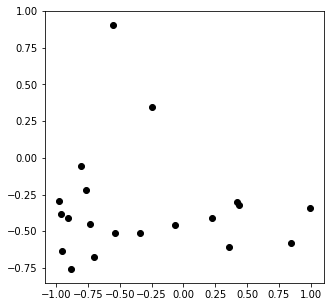

In [16]:
# строим график из отдельных точек
fig = plt.figure(figsize=(5, 5))
plt.scatter([i[0] for i in points], [i[1] for i in points], color='k')

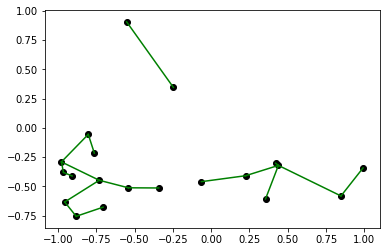

In [18]:
from scipy.spatial import distance
import numpy as np

dist = distance.cdist(points, points, 'euclidean') # матрица расстояний между для всех точек
plt.scatter([i[0] for i in points], [i[1] for i in points], color='k')
ij = []
b=0
# в цикле сортируем веса ребер по возрастанию и соединяем наименьшие, 
# если вершина является смежной, то ее не включаем
while len(ij)!=len(points)-clusters:
    i,j = np.where(dist==np.sort(dist[np.nonzero(dist)])[b*2])
    if i[0] not in ij:
        ij.append(i[0])
        plt.plot([points[i[0]][0],points[i[1]][0]],
                 [points[i[0]][1],points[i[1]][1]], 'g')
    b+=1
plt.show()